<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/datamining/Cereals.csv"
cereals_df = pd.read_csv(file_path)
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [6]:
two_variables = cereals_df[['name','calories','rating']]
two_variables.head()

,name,calories,rating
0,100%_Bran,70,68.402973
1,100%_Natural_Bran,120,33.983679
2,All-Bran,70,59.425505
3,All-Bran_with_Extra_Fiber,50,93.704912
4,Almond_Delight,110,34.384843


In [8]:
covariance_matrix= cereals_df [['calories','rating']].cov()
covariance_matrix

,calories,rating
calories,379.630895,-188.681562
rating,-188.681562,197.326321


import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8272432362321734514, *['calories'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8272432362321734514, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8272432362321734514, *['calories'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8272432362321734514, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8272432362321734514, *[[['calories', 'rating']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8272432362321734514, *['rating', 'calories', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8272432362321734514 = autoviz.get_df('df_8272432362321734514')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8272432362321734514, *['rating', 'count()', None], **{})
chart

In [10]:
covariance = covariance_matrix.loc['calories','rating']
std_feature1 = cereals_df['calories'].std()
std_feature2 = cereals_df['rating'].std()
correalation = covariance/(std_feature1*std_feature2)
correalation

-0.6893760311652583

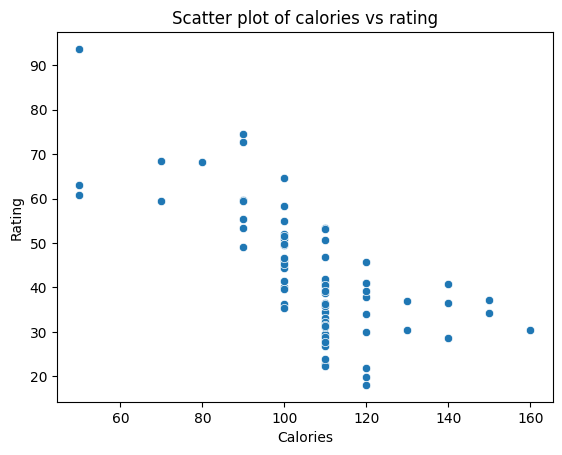

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x ='calories', y = 'rating', data = cereals_df)
plt.title('Scatter plot of calories vs rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

## PCA using Scikit-learn

In [15]:
from sklearn.decomposition import PCA

# We are interseted in calories and rating
df = cereals_df[['calories','rating']]
#Apply PCA
pca = PCA(n_components = 2)
principleComponents = pca.fit_transform(df)


In [18]:
pca_components_df = pd.DataFrame(pca.components_,columns=['PC1','PC2'],
                                 index =['calories','rating'])
pca_components_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


## Proportion of variance

In [20]:
variance = pd.DataFrame({'Proportion of Variance': pca.explained_variance_ratio_},
                        index = ['calories','rating'])
variance

,Proportion of Variance
calories,0.863191
rating,0.136809


In [21]:
pca_df = pd.DataFrame(data = principleComponents,
                      columns = ['PC1','PC2'])
pca_df

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686
...,...,...
72,-4.532085,-1.358466
73,-10.566224,-10.974956
74,9.615628,2.374065
75,10.574865,3.902783


## PCA for All features

In [24]:
df2 = cereals_df.iloc[:,3:].dropna(axis = 0)
pca = PCA()
principleComponents = pca.fit_transform(df2)


## Create a Dataframe that will contain weights of PCA of all featues



In [31]:
pca_components_df = pd.DataFrame(pca.components_,columns = df2.columns,
                                 index =[f'PC{i+1}' for i in range(len(pca.components_))])
pca_components_df.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959,0.118848,0.093857,-0.026191,0.009027,0.064517,0.008975,0.003853,4.193592e-02
protein,0.000757,0.008801,0.001026,0.003200,0.056176,0.112745,0.258103,0.655037,-0.202406,-0.255922,-0.045273,-0.004508,-6.162939e-01
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098,-0.131816,0.372584,-0.117932,0.123749,-0.841440,-0.062438,-0.008603,3.184690e-01
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948,0.022793,0.004508,0.000617,-0.004071,-0.000917,0.000243,0.000233,1.026023e-02
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605,0.262841,0.043114,-0.658776,0.226880,-0.144477,0.021072,0.000811,-6.483602e-01
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267,-0.537837,-0.672432,0.006300,-0.025163,-0.300149,-0.041873,0.014147,-2.056936e-01
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066,0.647923,-0.566975,0.103466,-0.117133,-0.319664,-0.028131,0.019273,1.364878e-01
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151,-0.049999,-0.017959,0.015376,0.001214,0.006339,0.000470,0.000951,6.400483e-03
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009,0.015757,0.012102,0.004025,0.012422,0.000539,-0.001544,0.000790,9.642514e-03
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876,-0.059901,0.092215,-0.327611,-0.934608,-0.046006,0.067769,-0.010328,5.145194e-09


In [32]:
variance = pd.DataFrame({'Proportion of Variance': pca.explained_variance_ratio_},
                        index =[f'PC{i+1}' for i in range(len(pca.components_))])
variance.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Proportion of Variance,0.539503,0.386674,0.039425,0.028291,0.005456,0.000336,0.000222,0.000047,0.000033,0.000011,0.000003,3.054014e-07,2.187435e-19


In [34]:
pca_df = pd.DataFrame(data = principleComponents)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,61.652948,177.052974,-23.453941,20.488738,-8.864543,3.172216,1.522039,-0.607901,0.130482,-0.034858,-0.072772,0.009281,3.611315e-08
1,150.581888,14.149983,12.058747,-33.123378,-5.816687,-3.933912,5.090111,-0.320257,0.397580,-0.402483,0.333711,-0.107490,5.833803e-09
2,-61.091829,234.123849,-36.930071,15.819497,-14.755613,-1.558949,0.404254,0.547593,-0.190562,0.167162,-0.123122,0.057721,5.205174e-08
3,62.048285,229.862403,-43.972571,39.733105,1.902807,4.653863,0.436793,-2.114240,0.489125,-0.324403,0.199504,-0.015846,-6.813035e-08
4,-21.892206,-26.621415,-0.197572,-8.290555,-9.039787,0.659304,1.891312,-0.018477,1.302968,0.078934,-0.118717,-0.016071,6.108613e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-91.298935,-26.150296,-13.499264,-3.639493,5.420239,-3.846587,-0.782207,-0.221213,-1.113432,-0.214269,-0.157052,0.021090,-4.036414e-08
70,11.056980,-76.874556,4.385681,-7.110289,-8.599445,0.785741,-0.936131,-0.394438,-0.006326,-0.271510,0.075821,-0.021312,-2.352730e-08
71,-62.608104,26.311493,-18.487574,3.593115,4.807201,-0.656020,0.291372,0.305846,1.007936,-0.125245,-0.226370,0.033005,-1.447698e-08
72,-33.740445,17.280761,-15.149969,4.437111,5.992691,-0.347821,0.272523,0.252621,1.077413,-0.196932,0.095133,-0.003610,1.189748e-08
